In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original=pd.read_csv('Diabetes.csv')
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
cols = [c for c in df_original.columns if c not in ['Pregnancies', 'Outcome']]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [4]:
df = df_original.copy()
df[cols] = df_original[cols].replace({0:np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---
# Scatter Matrix

In [7]:
import warnings
warnings.filterwarnings('ignore')

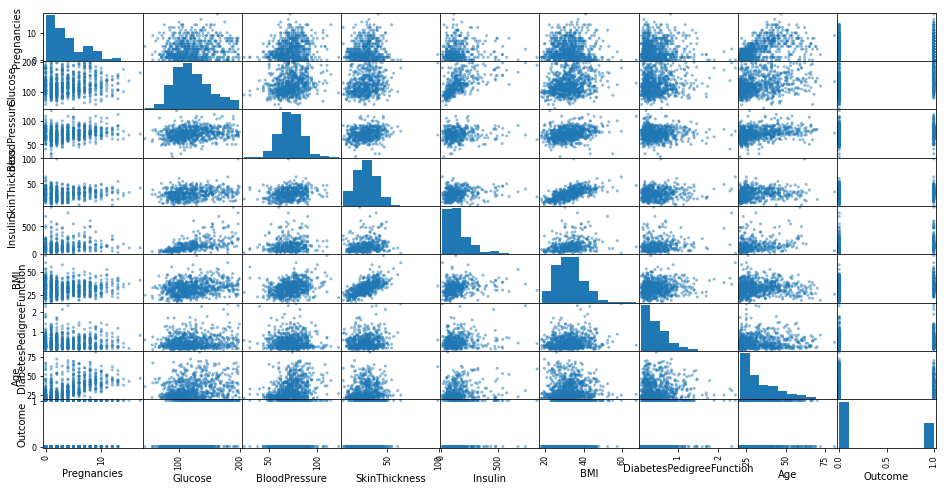

In [8]:
pd.plotting.scatter_matrix(df,figsize=(16,8));

In [9]:
df2 = df.dropna()

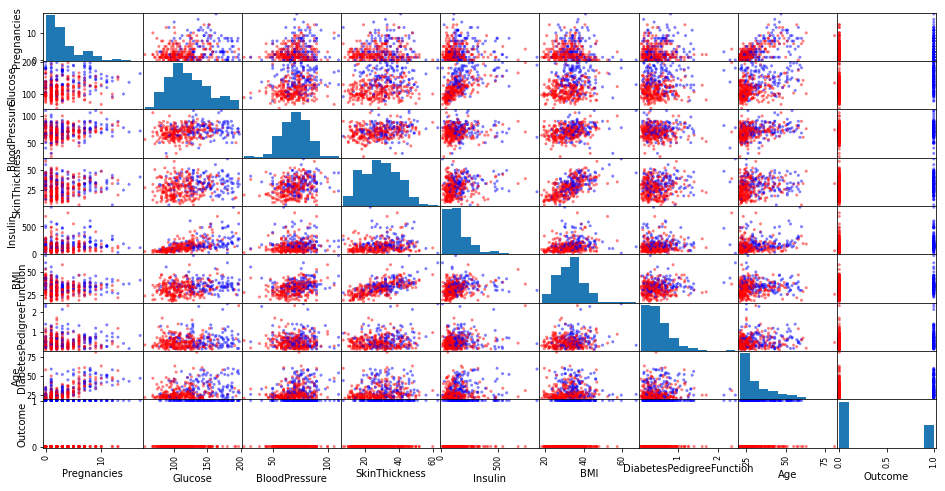

In [10]:
colors = df2['Outcome'].map(lambda x: 'blue' if x else 'red')
pd.plotting.scatter_matrix(df2,figsize=(16,8),color=colors);

---
Correlation Plots

In [11]:
df.corr()     #correlation table

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


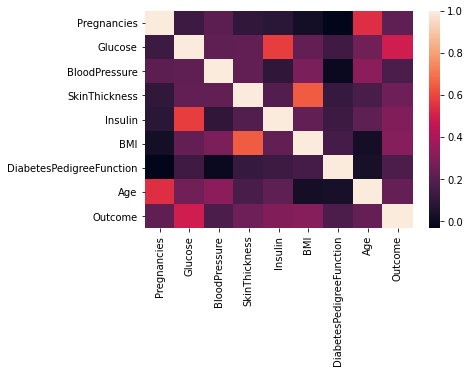

In [12]:
sns.heatmap(df.corr());

In [13]:
plt.rcParams['figure.figsize'] = 10,6

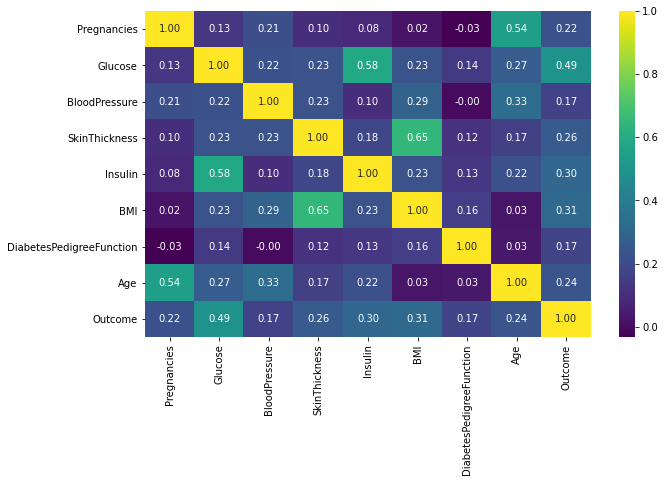

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='0.2f');

# 2D Histograms

In [15]:
df2 = pd.read_csv('height_weight.csv')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
sex       4231 non-null int64
height    4231 non-null float64
weight    4231 non-null float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


In [17]:
df2.describe()

,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


In [18]:
df2.head()

,sex,height,weight
0,1,71.74,259.88
1,1,71.00,186.73
2,2,63.83,172.17
3,1,67.74,174.66
4,2,67.28,169.20


In [19]:
df2.sex.unique()

array([1, 2], dtype=int64)

In [20]:
plt.rcParams['figure.figsize']=12,6

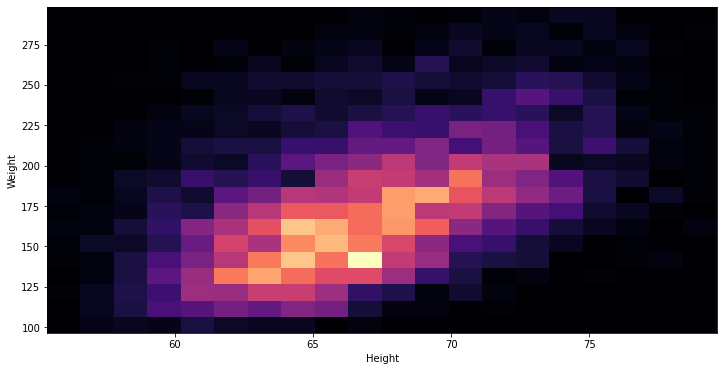

In [21]:
plt.hist2d(df2.height, df2.weight, bins=20, cmap='magma')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Contour Plots

In [22]:
sns.set_style('darkgrid')

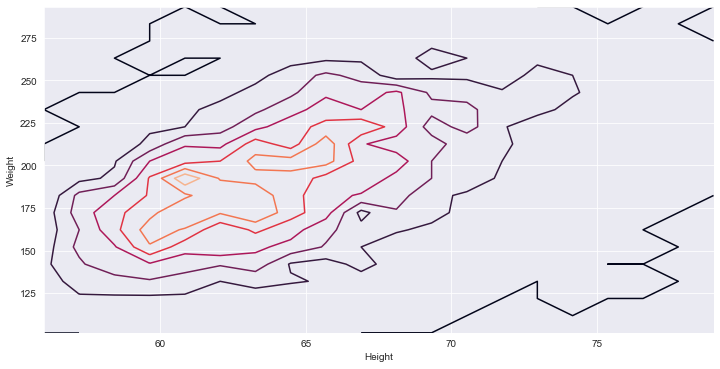

In [23]:
hist, x_edge, y_edge = np.histogram2d(df2.height, df2.weight, bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

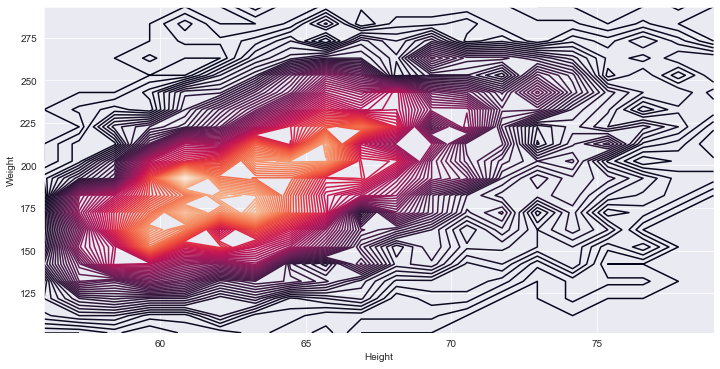

In [24]:
hist, x_edge, y_edge = np.histogram2d(df2.height, df2.weight, bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# KDE Plots

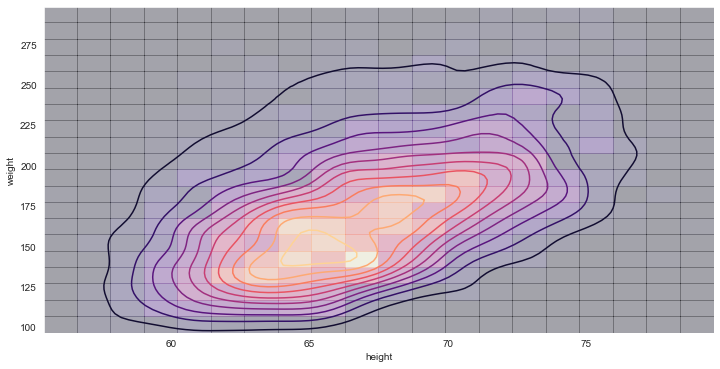

In [25]:
sns.kdeplot(df2.height, df2.weight, cmap='magma')
plt.hist2d(df2.height, df2.weight, bins=20, cmap='magma', alpha=0.3);

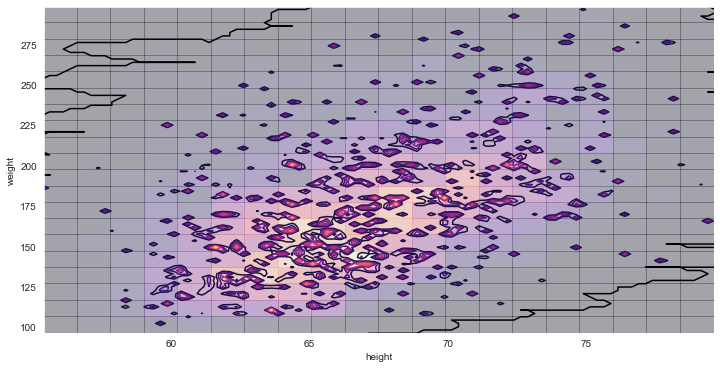

In [26]:
sns.kdeplot(df2.height, df2.weight, cmap='magma', bw=0.1)
plt.hist2d(df2.height, df2.weight, bins=20, cmap='magma', alpha=0.3);

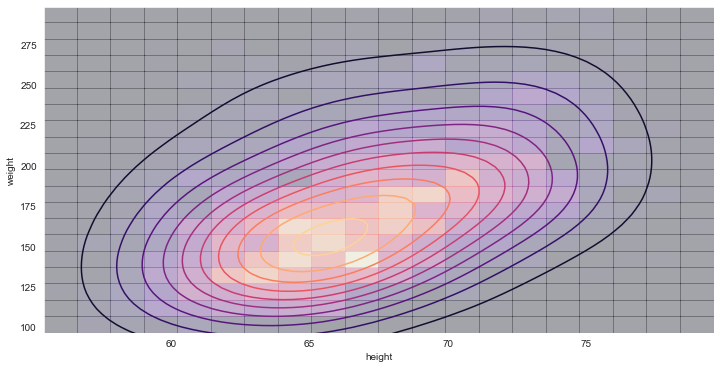

In [27]:
sns.kdeplot(df2.height, df2.weight, cmap='magma', bw=(2,20))
plt.hist2d(df2.height, df2.weight, bins=20, cmap='magma', alpha=0.3);

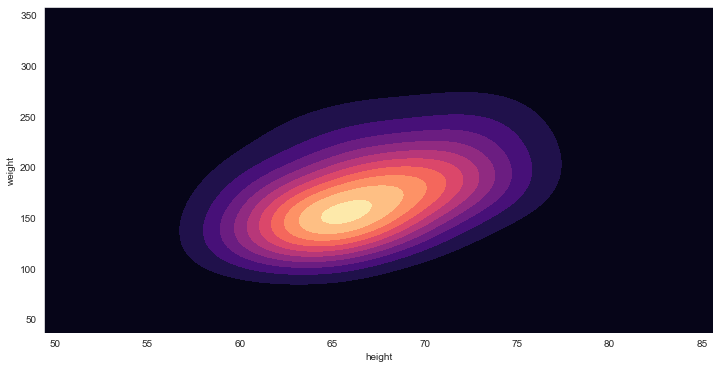

In [28]:
sns.kdeplot(df2.height, df2.weight, cmap='magma', bw=(2,20),shade=True);

# Scatter Plots

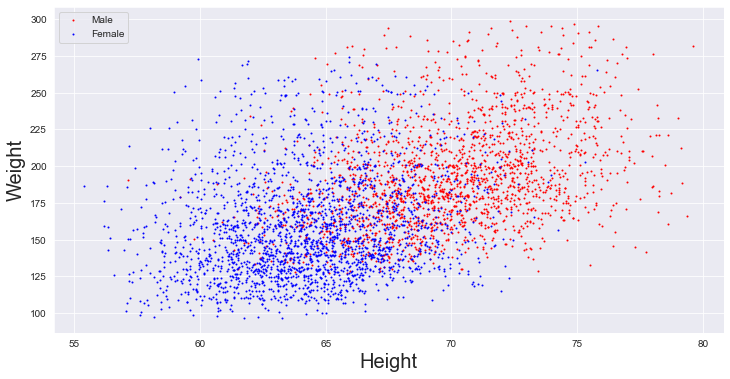

In [29]:
m = df2.sex == 1
plt.scatter(df2.loc[m, 'height'], df2.loc[m, 'weight'], color='red', s=1)
plt.scatter(df2.loc[~m, 'height'], df2.loc[~m, 'weight'], color='blue', s=1)
plt.xlabel('Height', size=20)
plt.ylabel('Weight', size=20)
plt.legend(['Male', 'Female'], loc=2)
plt.show()

# Treating Points with Probability

In [30]:
params = ['height', 'weight']
male = df2.loc[m, params].values
female = df2.loc[~m, params].values

male.shape

(1946, 2)

In [31]:
from chainconsumer import ChainConsumer
c = ChainConsumer()

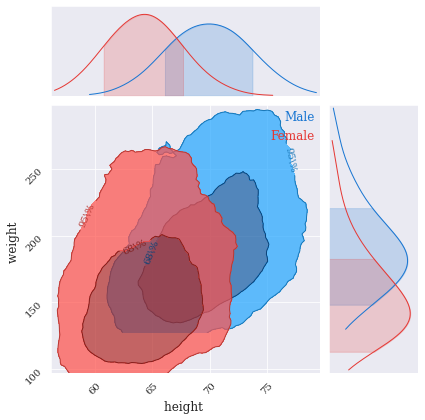

In [32]:
c.add_chain(male, parameters=params, name='Male', kde=1.0, color='b')
c.add_chain(female, parameters=params, name='Female', kde=1.0, color='r')
c.configure(contour_labels='confidence', usetex=False)
c.plotter.plot(figsize=2.0);

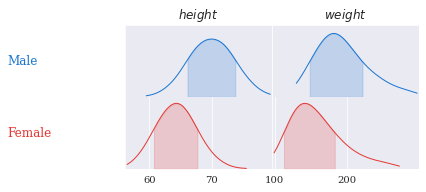

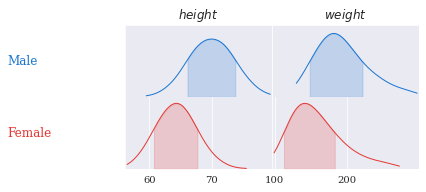

In [34]:
c.plotter.plot_summary(figsize=2.0)